# Compare tau decay distributions between Tauola and IceCube simulations

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from utils.hepmc_io import load_hepmc 
from collections import Counter

## Load decays

In [6]:
decay_products = load_hepmc("../data/tauola_output_genie_e5.dat").groupby("event_num").nth[3:].sort_values("event_num")
decay_products_nopol = load_hepmc("../data/tauola_output_genie_nopol_e5.dat").groupby("event_num").nth[3:].sort_values("event_num")
decay_products_g4 = pd.read_csv("../data/geant4_output_e5.csv").sort_values("event_num")

0
10000
20000
30000
40000
50000
0
10000
20000
30000
40000
50000


In [7]:
decay_products

,event_num,pdg,E,px,py,pz
3,4,16,1.132845,0.439469,-0.681560,0.790937
4,4,-211,2.542037,-0.439625,0.607542,2.424891
8,15,16,1.864992,-0.042088,-0.634777,1.753106
9,15,-211,0.190599,-0.051441,-0.118041,0.016393
10,15,111,1.259576,-0.014008,0.716687,1.026879
...,...,...,...,...,...,...
343061,999982,16,0.632004,-0.451806,-0.333709,0.289549
343067,999988,-211,0.890761,0.224052,-0.473834,0.706582
343068,999988,-211,0.221205,-0.113495,0.109653,0.067436
343066,999988,16,1.333526,0.133969,0.192002,1.312775


In [8]:
decay_products_nopol

,event_num,pdg,E,px,py,pz
3,4,16,2.926796,0.559238,-0.377204,2.847983
4,4,-211,0.748086,-0.559394,0.303186,0.367845
8,15,16,0.812844,0.591308,0.134654,0.541145
9,15,-211,1.442244,-0.289090,0.250823,1.383511
10,15,111,1.060078,-0.409755,-0.421608,0.871721
...,...,...,...,...,...,...
343274,999988,-211,0.942294,-0.040821,-0.147700,0.919215
343275,999988,211,0.277870,-0.130407,0.046377,0.196408
343272,999988,16,1.034345,0.107242,-0.285457,0.988324
343273,999988,-211,0.429344,0.318941,0.040296,0.248011


In [9]:
decay_products_g4

,event_num,pdg,E,px,py,pz
0,0,-211,2.146640,0.471600,-0.772368,1.941550
50,0,16,1.524980,-0.470983,0.699429,1.270650
16687,0,-211,2.146640,0.471600,-0.772368,1.941550
16733,0,16,1.524980,-0.470983,0.699429,1.270650
65,1,-211,0.315613,0.260604,0.039485,0.103239
...,...,...,...,...,...,...
183182,55030,16,1.312980,0.772382,0.404478,0.981708
183188,55031,111,0.877980,-0.127199,-0.390204,0.764324
183194,55031,111,1.523760,0.552076,-0.092933,1.410740
183212,55031,-211,1.077900,-0.490375,0.053564,0.948186


## Compare Geant4 decay products with Tauola decay products

In [37]:
def get_particle_property(decay_products: pd.DataFrame, pdg: int, prop: str) -> tuple[pd.Series, pd.Series]:
    nutau_e = decay_products.query("pdg == 16")[prop]
    anti_nutau_e = decay_products.query("pdg == -16")[prop]
    return nutau_e, anti_nutau_e


def compare_histos(nutau, anti_nutau, nutau_nopol, anti_nutau_nopol, nutau_g4, anti_nutau_g4, bins, density=None, **kwargs):
    fig, axs = plt.subplots(figsize=(10, 4), nrows=1, ncols=2, layout="constrained")

    for ax, label, lists, in zip(axs, ("Neutrino", "Anti-neutrino"), ((nutau, nutau_nopol, nutau_g4), (anti_nutau, anti_nutau_nopol, anti_nutau_g4))):
        for energies, particle_type in zip(lists, ("polarized", "unpolarized (Tauola)", "unpolarized (Geant4)")):
            ax.hist(energies, bins=bins, label=f"{label} {particle_type}", density=density, histtype="step", lw=2)
            # ax.set_title(f"{label} {particle_type}")
            
    for ax in axs.flat:
        ax.set(**kwargs, ylabel="Density of number of neutrinos")
        ax.grid(True, alpha=0.5)
        ax.legend(fontsize="large")

    return fig, axs

/home/simon/miniconda3/envs/cern-skhep/lib/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/home/simon/miniconda3/envs/cern-skhep/lib/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: xlabel='Neutrino energy [GeV]', ylabel='Density of number of neutrinos'>,
        <Axes: xlabel='Neutrino energy [GeV]', ylabel='Density of number of neutrinos'>],
       dtype=object))

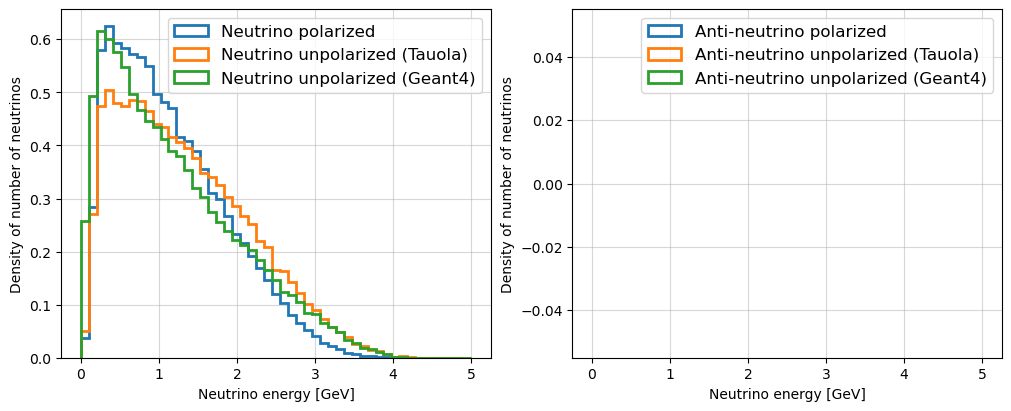

In [38]:
nutau, anti_nutau = get_particle_property(decay_products, 16, "E")
nutau_nopol, anti_nutau_nopol = get_particle_property(decay_products_nopol, 16, "E")
nutau_g4, anti_nutau_g4 = get_particle_property(decay_products_g4, 16, "E")

compare_histos(nutau, anti_nutau, nutau_nopol, anti_nutau_nopol, nutau_g4, anti_nutau_g4, 
               bins=np.linspace(0, 5, 50), xlabel="Neutrino energy [GeV]", density=True)

When viewing the distribution of all events (regardless of decay mode) and the neutrino energy in these cases, there is a slight shift. In the polarized simulations, the neutrinos typically have a lower energy that in the unpolarized case. This would mean that IceCube simulations using the unpolarized simulations underestimate the energy deposited in the detector, i.e., overestimate the missing energy.

## Pion momentum fraction
See Fig. 2 in the DUNE paper

In [34]:
def is_pion_nutau_event(event: pd.DataFrame) -> bool:
    return (event["pdg"] == -211).any() and (event["pdg"] == 16).any() and (event.shape[0] == 2)

# Only select events that decay to a pion and a neutrino (211 and 16)
pion_neutrino_events = (
    decay_products
    .groupby("event_num")
    .filter(is_pion_nutau_event)
)

pion_neutrino_events_nopol = (
    decay_products_nopol
    .groupby("event_num")
    .filter(is_pion_nutau_event)
)

pion_neutrino_events_g4 = (
    decay_products_g4
    .groupby("event_num")
    .filter(is_pion_nutau_event)
)

In [35]:
def pion_momentum_fraction(decay_products):
    # Calculate the momentum fraction of the pion (row 3-4) relative to the tau (row 2)
    pion_momentum = (
        decay_products
        .query("pdg.abs() == 211")
        .loc[:, "px":"pz"]
        .pow(2)
        .sum(axis=1)
        .pow(0.5)
    )

    decay_products = decay_products.copy()
    decay_products.loc[:, "P"] = decay_products.loc[:, "px":"pz"].pow(2).sum(axis=1).pow(0.5)
    
    tau_momentum = (
        decay_products
        .groupby("event_num")
        ["P"].sum()
    )
    return pion_momentum.values / tau_momentum.values


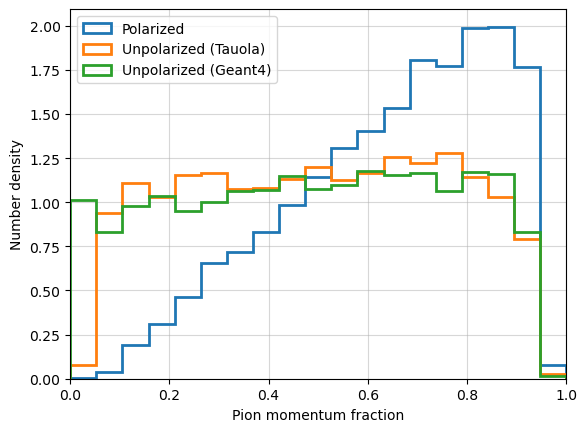

In [36]:
# Plot the momentum fraction as a histogram from 0 to 1
fig, ax = plt.subplots()
ax.hist(pion_momentum_fraction(pion_neutrino_events), bins=np.linspace(0, 1, 20), label="Polarized", histtype="step", density=True, lw=2)
ax.hist(pion_momentum_fraction(pion_neutrino_events_nopol), bins=np.linspace(0, 1, 20), label="Unpolarized (Tauola)", histtype="step", density=True, lw=2)
ax.hist(pion_momentum_fraction(pion_neutrino_events_g4), bins=np.linspace(0, 1, 20), label="Unpolarized (Geant4)", histtype="step", density=True, lw=2)
ax.set(xlim=(0, 1), xlabel="Pion momentum fraction", ylabel="Number density")
ax.grid(True, alpha=0.5)
ax.legend()

We see a clear difference between the decay using Tauola with real polarization given by GENIE and the unpolarized decay by Geant4.
A similar difference would likely be seen for the IceCube simulations.

In [1]:
# TODO plot amount of tau polarization that is given by GENIE. Either here or in tauola_pol.ipynb

In [2]:
# TODO plot angular distributions of particles in tau rest frame

In [ ]:
# TODO plot momentum fraction of neutrino for various decay modes. tau -> pi0 pi- nu_tau, tau -> pi0 pi0 pi- nu_tau etc. See Dune paper for details

## Branching ratios

In [27]:
def branching_ratios(decay_products: pd.DataFrame) -> dict[tuple[int], float]:
    n_taus = decay_products.query("pdg == 16").shape[0]
    n_anti_taus = decay_products.query("pdg == -16").shape[0]
    c = Counter(tuple(sorted(a.tolist())) for i, a in decay_products.groupby("event_num")["pdg"])
    
    br = {}
    
    for pdgs, n in c.items():
        if 16 in pdgs:
            br[pdgs] = n / n_taus
        elif -16 in pdgs:
            br[pdgs] = n / n_anti_taus
        else:
            raise ValueError("No tau in the event")
    
    # Sort based on the branching ratio. Highest first
    br = dict(sorted(br.items(), key=lambda item: item[1], reverse=True))
    return br

In [28]:
branching_ratios(decay_products)

{(-211, 16, 111): 0.2534161942142753,
 (-14, 13, 16): 0.16886538741096088,
 (-12, 11, 16): 0.15365605465910742,
 (-211, 16): 0.11093545573484519,
 (-211, 16, 111, 111): 0.09221907253961331,
 (-211, -211, 16, 211): 0.08929350196249455,
 (-211, -211, 16, 111, 211): 0.04551897078063672,
 (-12, 11, 16, 22): 0.02787469108882105,
 (-211, 16, 111, 111, 111): 0.009467219072539614,
 (-321, 16): 0.006468963512138392,
 (-14, 13, 16, 22): 0.0059238261375199885,
 (-321, -211, 16, 211): 0.005651257450210787,
 (-321, 16, 111): 0.004633667684256433,
 (-211, 16, 310): 0.004615496438435819,
 (-211, 16, 130): 0.004470126471870912,
 (-211, 16, 111, 310): 0.003198139264427969,
 (-211, 16, 111, 130): 0.003034598052042448,
 (-211, 16, 111, 221): 0.001617240878034598,
 (-321, -211, 16, 321): 0.001617240878034598,
 (-211, 16, 22, 111): 0.0012356447158017154,
 (-211, -211, 16, 111, 111, 211): 0.0009449047826718999,
 (-321, 16, 111, 310): 0.000708678587003925,
 (-321, 16, 130): 0.0006905073411833116,
 (-211, 16,

In [29]:
branching_ratios(decay_products_nopol)

{(-211, 16, 111): 0.2525439744148859,
 (-14, 13, 16): 0.1707733682221253,
 (-12, 11, 16): 0.1546918156708824,
 (-211, 16): 0.10939089984009304,
 (-211, 16, 111, 111): 0.09171027765663614,
 (-211, -211, 16, 211): 0.08856665212967,
 (-211, -211, 16, 111, 211): 0.0465729030382323,
 (-12, 11, 16, 22): 0.027965547317924118,
 (-211, 16, 111, 111, 111): 0.010175897659543538,
 (-321, 16): 0.006305422299752871,
 (-321, -211, 16, 211): 0.0059238261375199885,
 (-14, 13, 16, 22): 0.005487716237825266,
 (-321, 16, 111): 0.004833551388283181,
 (-211, 16, 130): 0.004706352667538887,
 (-211, 16, 310): 0.004161215292920482,
 (-211, 16, 111, 310): 0.0029255705771187674,
 (-211, 16, 111, 130): 0.0027075156272714056,
 (-211, 16, 111, 221): 0.0017807820904201192,
 (-321, -211, 16, 321): 0.0016717546154964384,
 (-211, 16, 22, 111): 0.0013083296990841692,
 (-211, -211, 16, 111, 111, 211): 0.0009994185201337403,
 (-321, 16, 111, 310): 0.0006541648495420846,
 (-321, 16, 111, 130): 0.0005633086204390173,
 (-321

In [30]:
branching_ratios(decay_products_g4)

{(-211, 16, 111): 0.23029711487559557,
 (-12, 11, 16): 0.16134528851244045,
 (-14, 13, 16): 0.15830134992059292,
 (-211, 16): 0.09968898888300688,
 (-211, -211, 16, 211): 0.08612361037586025,
 (-211, 16, 111, 111): 0.08172313393329804,
 (-211, -211, 16, 16, 111, 111): 0.02567496029645315,
 (-12, -12, 11, 11, 16, 16): 0.01765153520381154,
 (-14, -14, 13, 13, 16, 16): 0.017469560614081524,
 (-211, -211, 16, 16): 0.010786130227633669,
 (-211, -211, -211, -211, 16, 16, 211, 211): 0.009346876654314452,
 (-211, -211, 16, 16, 111, 111, 111, 111): 0.008403917416622551,
 (-12, 11, 11, 16): 0.0007444415034409741,
 (-211, 11, 16, 111): 0.0007444415034409741,
 (-14, 11, 13, 16): 0.0007278983589200635,
 (-211, 11, 16): 0.0005459237691900476,
 (-211, 11, 16, 111, 111): 0.0002812334568554791,
 (-211, -211, 11, 16, 211): 0.00026469031233456857,
 (-211, -211, 11, 11, 16, 16, 111, 111): 9.925886712546321e-05,
 (-14, -14, 11, 11, 13, 13, 16, 16): 4.9629433562731603e-05,
 (-211, -211, 11, 11, 16, 16, 111,

We see that there is no large difference ($\mathcal{O}(0.1\%)$) in branching ratio between polarized and unpolarized Tauola decays. This is good, as they should be identical, since the branching ratio is not affected by the polarization.

The Geant4 branching ratios differ by $\mathcal{O}(1\%)$ from the Tauola branching ratios. This discrepancy might be the reason for the large difference between the neutrino energy distributions between the unpolarized Tauola and Geant4 simulations. This is further strenghened by the fact that when only looking at the $\tau^- \to \pi^- \nu_tau$ decay mode, the distributions for unpolarized Tauola and Geant4 are much more similar.